In [39]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Predictive: XGBoost Regressor Model

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
import sys
sys.path.insert(0, '../../src')

In [6]:
sales_train = pd.read_parquet('../../data/interim/predictive_sales_train.to_parquet')

In [9]:
sales_train_reduce_size = sales_train[sales_train['date'] >= '2014-04-18']

In [45]:
mean_sales_item_id_month = sales_train_reduce_size.copy()

In [46]:
mean_sales_item_id_month['month'] = mean_sales_item_id_month['date'].dt.month
mean_sales_item_id_month = mean_sales_item_id_month.groupby(['item_id', 'store_id', 'month'])[['sales', 'sell_price']].mean().reset_index()

In [47]:
mean_sales_item_id_month

,item_id,store_id,month,sales,sell_price
0,FOODS_1_001,CA_1,1,0.709677,2.24
1,FOODS_1_001,CA_1,2,0.607143,2.24
2,FOODS_1_001,CA_1,3,0.612903,2.24
3,FOODS_1_001,CA_1,4,0.750000,2.24
4,FOODS_1_001,CA_1,5,0.935484,2.24
...,...,...,...,...,...
365875,HOUSEHOLD_2_516,WI_3,8,0.161290,5.94
365876,HOUSEHOLD_2_516,WI_3,9,0.166667,5.94
365877,HOUSEHOLD_2_516,WI_3,10,0.096774,5.94
365878,HOUSEHOLD_2_516,WI_3,11,0.033333,5.94


In [48]:
mean_sales_item_id_month.to_csv('../../data/mean_sales_item_id_month.csv', index=False)

In [7]:
from features.data_prep import preprocess

In [10]:
df_train, item_id_encoder, dept_id_encoder, store_id_encoder, state_id_encoder, cat_id_encoder = preprocess(sales_train_reduce_size.copy())

### Save the `encoder` in the `models/predictive` folder.

In [9]:
from joblib import dump

dump(item_id_encoder, '../../models/predictive/item_id_encoder.joblib')
dump(dept_id_encoder, '../../models/predictive/dept_id_encoder.joblib')
dump(store_id_encoder, '../../models/predictive/store_id_encoder.joblib')
dump(state_id_encoder, '../../models/predictive/state_id_encoder.joblib')
dump(cat_id_encoder, '../../models/predictive/cat_id_encoder.joblib')

['../../models/predictive/cat_id_encoder.joblib']

In [10]:
del sales_train, sales_train_reduce_size

In [11]:
df_train.dropna(inplace=True)

In [12]:
df_train

,item_id,dept_id,cat_id,store_id,state_id,sales,sell_price,total_sales,year,month,day_of_week,ema_sales_7,rolling_std_7,ema_sales_14,rolling_std_14,ema_sales_21,rolling_std_21,ema_sales_28,rolling_std_28
35886757,1464,3,1,0,0,1,7.98,7.98,2014,4,4,2.491666,3.705864,2.191731,3.657670,2.207374,3.281558,2.243812,3.905125
35886758,1465,3,1,0,0,3,7.98,23.94,2014,4,4,7.855026,9.048469,5.137949,6.791804,4.315993,5.752869,3.955606,5.546649
35886759,1466,3,1,0,0,8,0.70,5.60,2014,4,4,7.291169,8.822857,5.200409,6.632709,4.439817,5.762625,4.084070,5.534604
35886760,1467,3,1,0,0,0,10.98,0.00,2014,4,4,5.468133,8.822857,4.498712,6.632709,4.014014,5.762625,3.767908,5.534604
35886761,1468,3,1,0,0,3,0.58,1.74,2014,4,4,4.536006,8.669862,4.127069,6.583069,3.797007,5.722413,3.612235,5.126204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47107045,1432,2,0,9,2,2,2.88,5.76,2015,4,5,4.505427,4.360007,3.735331,3.737996,3.413028,4.310902,3.252430,4.083399
47107046,1433,2,0,9,2,0,2.00,0.00,2015,4,5,3.379070,4.360007,3.237287,3.835645,3.102753,4.310902,3.028125,4.083399
47107047,1434,2,0,9,2,0,3.98,0.00,2015,4,5,2.534303,4.360007,2.805649,3.489595,2.820684,3.416943,2.819289,3.982942
47107048,1435,2,0,9,2,0,1.28,0.00,2015,4,5,1.900727,4.360007,2.431562,3.489595,2.564259,3.446735,2.624855,3.982942


In [40]:
sales_test = pd.read_parquet('../../data/interim/predictive_sales_test.to_parquet')

In [50]:
sales_test.tail(20)

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,event_name,event_type,sell_price
59303030,FOODS_3_808_WI_3_evaluation,FOODS_3_808,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,No Event,No Event,0.94
59303031,FOODS_3_809_WI_3_evaluation,FOODS_3_809,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,11617,No Event,No Event,1.00
59303032,FOODS_3_810_WI_3_evaluation,FOODS_3_810,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,No Event,No Event,2.56
59303033,FOODS_3_811_WI_3_evaluation,FOODS_3_811,FOODS_3,FOODS,WI_3,WI,d_1941,31,2016-05-22,11617,No Event,No Event,1.88
59303034,FOODS_3_812_WI_3_evaluation,FOODS_3_812,FOODS_3,FOODS,WI_3,WI,d_1941,3,2016-05-22,11617,No Event,No Event,2.94
59303035,FOODS_3_813_WI_3_evaluation,FOODS_3_813,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,11617,No Event,No Event,4.54
59303036,FOODS_3_814_WI_3_evaluation,FOODS_3_814,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,No Event,No Event,1.88
59303037,FOODS_3_815_WI_3_evaluation,FOODS_3_815,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,No Event,No Event,2.48
59303038,FOODS_3_816_WI_3_evaluation,FOODS_3_816,FOODS_3,FOODS,WI_3,WI,d_1941,0,2016-05-22,11617,No Event,No Event,0.25
59303039,FOODS_3_817_WI_3_evaluation,FOODS_3_817,FOODS_3,FOODS,WI_3,WI,d_1941,1,2016-05-22,11617,No Event,No Event,2.94


In [14]:
df_test = preprocess(sales_test.copy())[0]

In [15]:
del sales_test

In [16]:
df_test

,item_id,dept_id,cat_id,store_id,state_id,sales,sell_price,total_sales,year,month,day_of_week,ema_sales_7,rolling_std_7,ema_sales_14,rolling_std_14,ema_sales_21,rolling_std_21,ema_sales_28,rolling_std_28
47107050,1437,3,1,0,0,0,8.26,0.00,2015,4,6,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
47107051,1438,3,1,0,0,0,3.97,0.00,2015,4,6,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
47107052,1439,3,1,0,0,0,2.97,0.00,2015,4,6,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000,NaN
47107053,1440,3,1,0,0,4,4.64,18.56,2015,4,6,6.787657,NaN,5.678028,NaN,5.322853,NaN,5.148542,NaN
47107054,1441,3,1,0,0,3,2.88,8.64,2015,4,6,7.394827,NaN,6.450802,NaN,6.118357,NaN,5.950017,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59303045,1432,2,0,9,2,1,2.98,2.98,2016,5,6,7.704812,7.926755,7.145593,15.656819,7.099594,14.069151,7.165416,12.828878
59303046,1433,2,0,9,2,0,2.48,0.00,2016,5,6,5.778609,8.221183,6.192847,15.656819,6.454176,14.093327,6.671250,12.828878
59303047,1434,2,0,9,2,2,3.98,7.96,2016,5,6,6.323957,7.773278,6.428468,6.302364,6.591069,13.095745,6.760129,12.769022
59303048,1435,2,0,9,2,0,1.28,0.00,2016,5,6,4.742967,8.028771,5.571339,6.309204,5.991881,13.095745,6.293913,12.769022


#### Save the `df_train` and `df_test` to `data/processed`

In [17]:
df_train.to_parquet('../../data/processed/predictive_df_train.to_parquet')
df_test.to_parquet('../../data/processed/predictive_df_test.to_parquet')

#### Load the `extract_features_target` function

In [6]:
df_train = pd.read_parquet('../../data/processed/predictive_df_train.to_parquet')
df_test = pd.read_parquet('../../data/processed/predictive_df_test.to_parquet')

In [17]:
from features.data_prep import extract_features_target

In [18]:
X_train, X_test, y_train, y_test = extract_features_target(df_train, df_test, 'total_sales')

In [19]:
del df_train, df_test

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(11220293, 18)
(11220293,)
(12196000, 18)
(12196000,)


#### Import the XGBRegressor and mean_square_error 

In [21]:
from xgboost import XGBRegressor, plot_importance

In [22]:
xgb = XGBRegressor(objective='reg:tweedie', learning_rate=0.16, max_depth=9, subsample=0.7, colsample_bytree=0.7, n_estimators=100, tree_method='approx')

In [23]:
xgb_model = xgb.fit(X_train, y_train)

#### Save the `xgb_model` in `modeles/predictive`

In [26]:
from joblib import dump

In [27]:
dump(xgb_model, '../../models/predictive/xgb_model_reduce.joblib')

['../../models/predictive/xgb_model_reduce.joblib']

In [24]:
y_pred = xgb_model.predict(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

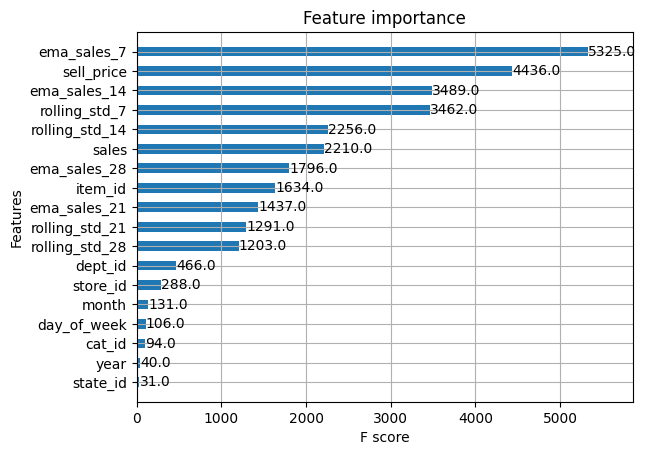

In [28]:
plot_importance(xgb_model, height=0.5)

In [31]:
predicted_total_sales = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
predicted_total_sales

,y_test,y_pred
47107050,0.00,6.637096e-13
47107051,0.00,1.251955e-12
47107052,0.00,4.342003e-12
47107053,18.56,1.831501e+01
47107054,8.64,9.469273e+00
...,...,...
59303045,2.98,3.389256e+00
59303046,0.00,4.208765e-09
59303047,7.96,7.568368e+00
59303048,0.00,3.289389e-09


In [38]:
predicted_total_sales.head(60)

,y_test,y_pred
47107050,0.00,6.637096e-13
47107051,0.00,1.251955e-12
47107052,0.00,4.342003e-12
47107053,18.56,1.831501e+01
47107054,8.64,9.469273e+00
47107055,2.00,2.371510e+00
47107056,7.88,1.040044e+01
47107057,1.92,2.630044e+00
47107058,0.00,2.988506e-09
47107059,8.91,1.098705e+01


In [33]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(predicted_total_sales['y_test'], predicted_total_sales['y_pred'], squared=False)
print(rmse)

0.7685131846869985
